In [1]:
%pylab inline
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
from itertools import product

def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

Populating the interactive namespace from numpy and matplotlib


In [2]:
#milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

In [12]:
milk=pd.read_csv('monthly-milk-production.csv', ';', index_col='month', parse_dates=True, dayfirst=True)

In [13]:
milk.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


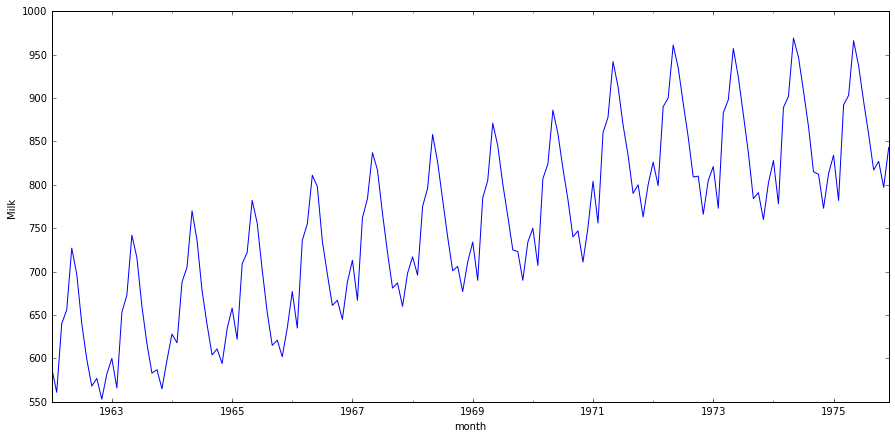

In [4]:
plt.figure(figsize(15,7))
milk.milk.plot()
plt.ylabel('Milk')
pylab.show()

In [5]:
import statsmodels.api as sm
sm.tsa.stattools.adfuller(milk.milk)

(-1.3038115874221257,
 0.6274267086030334,
 13L,
 154L,
 {'1%': -3.4735425281962091,
  '10%': -2.5768780536346769,
  '5%': -2.880497674144038},
 1115.1730447395112)

In [23]:
milk['milk_norm']=milk.milk/milk.index.days_in_month

In [28]:
np.sum(milk.milk_norm)

4166.326661899464

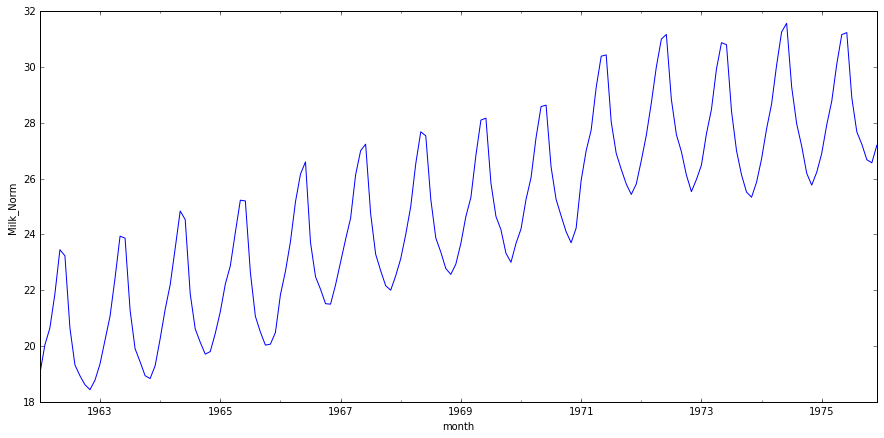

In [29]:
plt.figure(figsize(15,7))
milk.milk_norm.plot()
plt.ylabel('Milk_Norm')
pylab.show()

In [30]:
milk.daily_diff1 = milk.milk_norm - milk.milk_norm.shift(12)

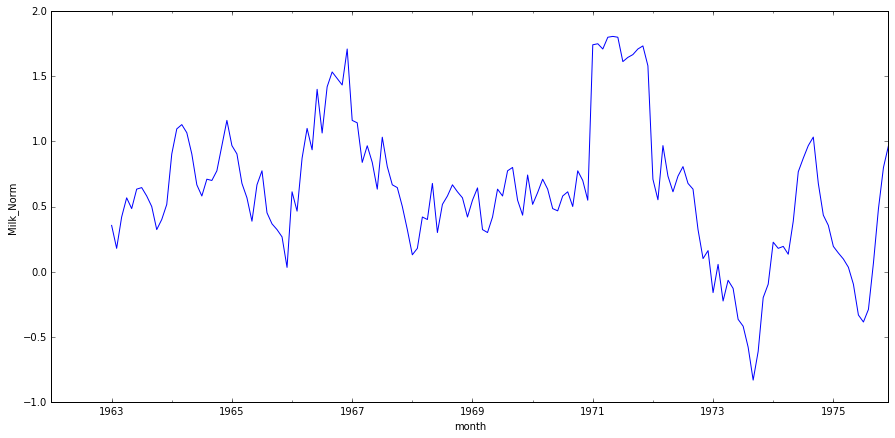

In [31]:
plt.figure(figsize(15,7))
milk.daily_diff1.plot()
plt.ylabel('Milk_Norm')
pylab.show()

In [33]:
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(milk.daily_diff1[12:])[1])

Критерий Дики-Фуллера: p=0.221277


Критерий Дики-Фуллера: p=0.000002


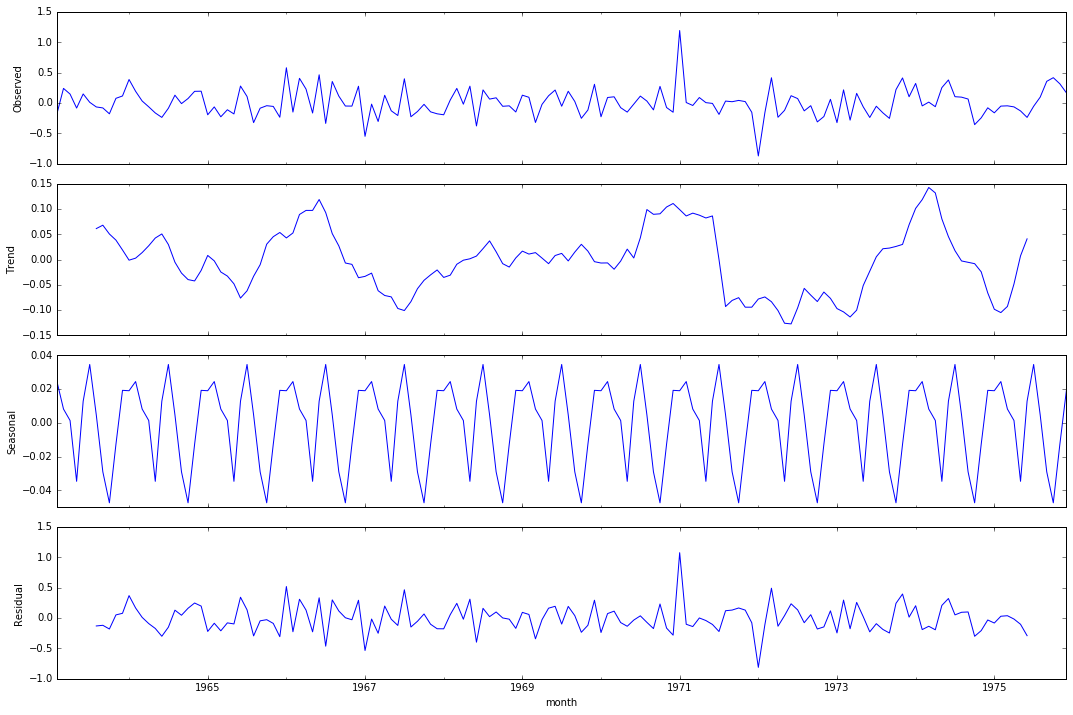

In [35]:
milk.daily_diff2 = milk.daily_diff1 - milk.daily_diff1.shift(1)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(milk.daily_diff2[13:]).plot()   
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(milk.daily_diff2[13:])[1])

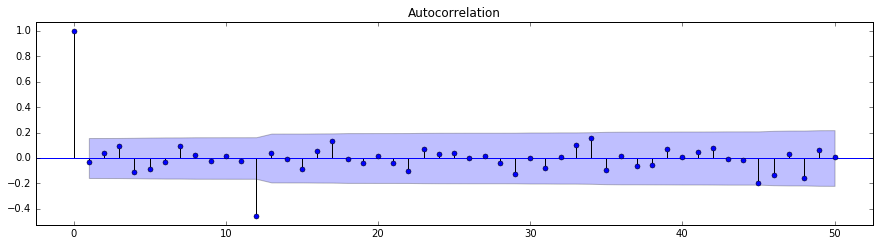

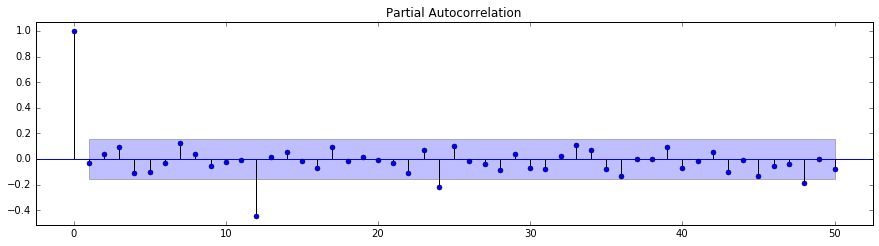

In [41]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(milk.daily_diff2[13:].values.squeeze(), lags=50, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(milk.daily_diff2[13:].values.squeeze(), lags=50, ax=ax)
pylab.show()




In [42]:
840./96.

8.75

In [43]:
(1387.-987.)/987.*100.

40.52684903748733

In [47]:
3402./810.

4.2